In [1]:
import tensorflow as tf

In [2]:
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.16871712]
 [-2.166313  ]
 [-0.00734602]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.5380206 ]
 [0.36590862]
 [0.62887347]], shape=(3, 1), dtype=float32)


In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.3323826 ],
       [-0.29225644],
       [ 0.86742216]], dtype=float32)>


In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [12]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [13]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [14]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [15]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),np.ones((num_samples_per_class, 1), dtype="float32")))

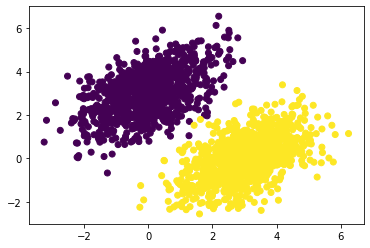

In [16]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [17]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [18]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [19]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [20]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [21]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.5990
Loss at step 1: 0.6202
Loss at step 2: 0.2045
Loss at step 3: 0.1391
Loss at step 4: 0.1222
Loss at step 5: 0.1126
Loss at step 6: 0.1047
Loss at step 7: 0.0976
Loss at step 8: 0.0911
Loss at step 9: 0.0852
Loss at step 10: 0.0799
Loss at step 11: 0.0750
Loss at step 12: 0.0705
Loss at step 13: 0.0665
Loss at step 14: 0.0628
Loss at step 15: 0.0594
Loss at step 16: 0.0563
Loss at step 17: 0.0535
Loss at step 18: 0.0510
Loss at step 19: 0.0486
Loss at step 20: 0.0465
Loss at step 21: 0.0446
Loss at step 22: 0.0428
Loss at step 23: 0.0412
Loss at step 24: 0.0398
Loss at step 25: 0.0384
Loss at step 26: 0.0372
Loss at step 27: 0.0361
Loss at step 28: 0.0351
Loss at step 29: 0.0342
Loss at step 30: 0.0333
Loss at step 31: 0.0326
Loss at step 32: 0.0319
Loss at step 33: 0.0312
Loss at step 34: 0.0307
Loss at step 35: 0.0301
Loss at step 36: 0.0297
Loss at step 37: 0.0292
Loss at step 38: 0.0288
Loss at step 39: 0.0285


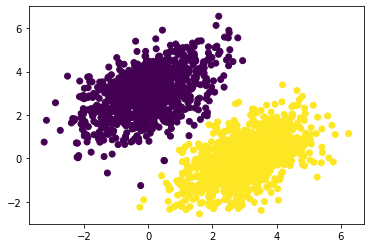

In [22]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

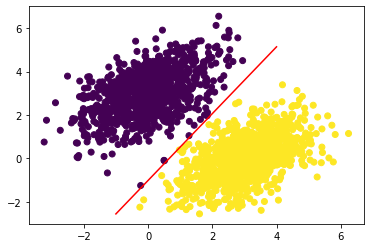

In [23]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [24]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [25]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [26]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

In [27]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [28]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [29]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 2.2575 - binary_accuracy: 0.9975
Epoch 2/5
16/16 [==============================] - 0s 2ms/step - loss: 2.0860 - binary_accuracy: 0.9975
Epoch 3/5
16/16 [==============================] - 0s 2ms/step - loss: 1.9429 - binary_accuracy: 0.9975
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 1.8078 - binary_accuracy: 0.9975
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 1.6780 - binary_accuracy: 0.9975


In [30]:
history.history

{'loss': [2.2574543952941895,
  2.0859906673431396,
  1.942895531654358,
  1.8077824115753174,
  1.6780288219451904],
 'binary_accuracy': [0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858,
  0.9975000023841858]}

In [31]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 4ms/step - loss: 0.1484 - binary_accuracy: 0.9514 - val_loss: 0.0861 - val_binary_accuracy: 0.9283
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0693 - binary_accuracy: 0.9650 - val_loss: 0.0887 - val_binary_accuracy: 0.9650
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0752 - binary_accuracy: 0.9557 - val_loss: 0.0491 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0752 - binary_accuracy: 0.9564 - val_loss: 0.1338 - val_binary_accuracy: 0.9717
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0704 - binary_accuracy: 0.9521 - val_loss: 0.1560 - val_binary_accuracy: 0.7667


In [32]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

[[0.36911643]
 [0.40548682]
 [0.43120372]
 [0.49386027]
 [0.54038393]
 [0.89198303]
 [1.23335   ]
 [0.13137504]
 [0.5254006 ]
 [1.0079292 ]]
